# Plotting Exoplanets

#### by Denton Woods
version 1

Inspired by http://www.space.com/35470-exoplanet-archive-tracks-alien-worlds.html

In [33]:
%pylab inline
import pandas as pd
from PyAstronomy import pyasl
import math
import random

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [34]:
# Data from the NASA Exoplanet Archive (http://exoplanetarchive.ipac.caltech.edu)
#  This was manually downloaded from their site.
df=pd.read_csv("planets.csv", skiprows=145)

In [35]:
df[:2]

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_bmvj,st_vjmic,st_vjmrc,st_jmh2,st_hmk2,st_jmk2,st_bmy,st_m1,st_c1,st_colorn
0,1,11 Com,b,Radial Velocity,1,326.03,1.29,0.231,NaN,19.4,...,1.010,NaN,NaN,0.459,0.202,0.661,NaN,NaN,NaN,7
1,2,11 UMi,b,Radial Velocity,1,516.22,1.54,0.080,NaN,10.5,...,1.369,NaN,NaN,0.785,0.152,0.937,NaN,NaN,NaN,5


In [36]:
# This is all the information we want from the 142 columns.
x = ['ra', 'dec', 'st_teff', 'st_rad', 'pl_orbsmax', 'pl_radj', 'pl_eqt']
dfx = df[x]
dfx.head()

,ra,dec,st_teff,st_rad,pl_orbsmax,pl_radj,pl_eqt
0,185.179276,17.792868,4742.0,19.00,1.290,NaN,NaN
1,229.274536,71.823898,4340.0,24.08,1.540,NaN,NaN
2,352.822571,39.236198,4813.0,11.00,0.830,NaN,NaN
3,242.601303,43.817646,5311.0,NaN,2.770,NaN,NaN
4,295.466553,50.517525,5674.0,NaN,1.681,NaN,NaN


In [37]:
dfx.describe()

,ra,dec,st_teff,st_rad,pl_orbsmax,pl_radj,pl_eqt
count,3442.000000,3442.000000,3273.000000,3078.000000,1949.000000,2735.000000,389.000000
mean,257.403843,28.701024,5545.145310,1.483739,7.655952,0.352480,1222.372751
std,76.678121,30.156490,1748.581428,3.141407,88.640524,0.402612,587.989241
min,0.325750,-84.231613,575.000000,0.040000,0.004400,0.029000,50.000000
25%,278.551467,23.135661,NaN,NaN,NaN,NaN,NaN
50%,288.942633,42.166415,NaN,NaN,NaN,NaN,NaN
75%,294.325546,46.456886,NaN,NaN,NaN,NaN,NaN
max,359.974304,85.736153,57000.000000,51.100000,2500.000000,6.900000,2700.000000


In [38]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442 entries, 0 to 3441
Data columns (total 7 columns):
ra            3442 non-null float64
dec           3442 non-null float64
st_teff       3273 non-null float64
st_rad        3078 non-null float64
pl_orbsmax    1949 non-null float64
pl_radj       2735 non-null float64
pl_eqt        389 non-null float64
dtypes: float64(7)
memory usage: 188.3 KB


In [39]:
positions = dfx.values

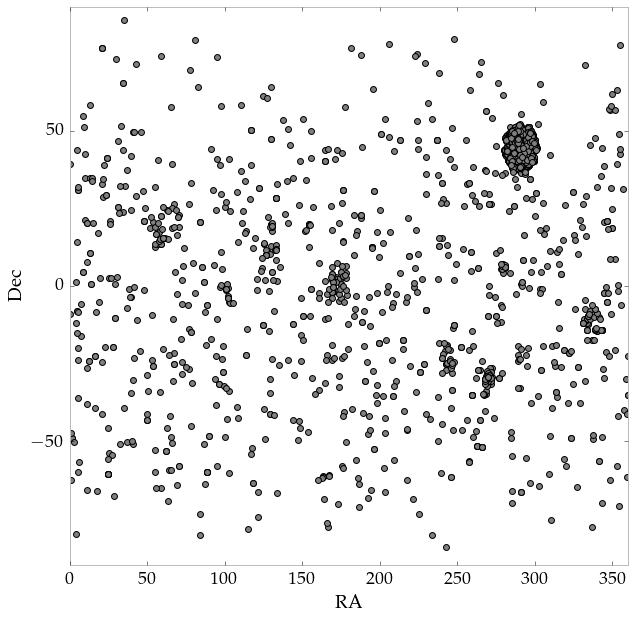

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.scatter(np.transpose(positions)[0],np.transpose(positions)[1], s=50, marker='o', edgecolor='none', c=[0.5, 0.5, 0.5])
ax.scatter(np.transpose(positions)[0],np.transpose(positions)[1], s=35, marker='o', c=[0.5, 0.5, 0.5])
plt.xlim([0, 360])
plt.ylim([-90, 90])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [41]:
### Not using this one below

# Converted from http://www.tannerhelland.com/4435/convert-temperature-rgb-algorithm-code/
#  Given a temperature (in Kelvin), estimate an RGB equivalent
def temptocolor(tmpKelvin):
    if np.isnan(tmpKelvin):
        return [1, 1, 1]
    # Temperature must fall between 1000 and 40000 degrees
    if tmpKelvin < 1000:
        tmpKelvin = 1000
    if tmpKelvin > 40000:
        tmpKelvin = 40000
    
    # All calculations require tmpKelvin / 100, so only do the conversion once
    tmpKelvin = tmpKelvin / 100
    
    #Calculate each color in turn
    
    #First: red
    if tmpKelvin <= 66:
        r = 255
    else:
        #Note: the R-squared value for this approximation is .988
        tmpCalc = tmpKelvin - 60
        tmpCalc = 329.698727446 * (tmpCalc ** -0.1332047592)
        r = tmpCalc
        if r < 0:
            r = 0
        if r > 255:
            r = 255
    
    #Second: green
    if tmpKelvin <= 66:
        #Note: the R-squared value for this approximation is .996
        tmpCalc = tmpKelvin
        tmpCalc = 99.4708025861 * np.log(tmpCalc) - 161.1195681661
        g = tmpCalc
        if g < 0:
            g = 0
        if g > 255:
            g = 255
    else:
        #Note: the R-squared value for this approximation is .987
        tmpCalc = tmpKelvin - 60
        tmpCalc = 288.1221695283 * (tmpCalc ** -0.0755148492)
        g = tmpCalc
        if g < 0:
            g = 0
        if g > 255:
            g = 255
    
    #Third: blue
    if tmpKelvin >= 66:
        b = 255
    elif tmpKelvin <= 19:
        b = 0
    else:
        #Note: the R-squared value for this approximation is .998
        tmpCalc = tmpKelvin - 10
        tmpCalc = 138.5177312231 * np.log(tmpCalc) - 305.0447927307
        
        b = tmpCalc
        if b < 0:
            b = 0
        if b > 255:
            b = 255

    return np.array([r, g, b]) / 255

In [42]:
### Not using this one below

# From http://stackoverflow.com/questions/21977786/star-b-v-color-index-to-apparent-rgb-color
def bv2rgb(bv):
  if bv < -0.4: bv = -0.4
  if bv > 2.0: bv = 2.0
  if bv >= -0.40 and bv < 0.00:
    t = (bv + 0.40) / (0.00 + 0.40)
    r = 0.61 + 0.11 * t + 0.1 * t * t
    g = 0.70 + 0.07 * t + 0.1 * t * t
    b = 1.0
  elif bv >= 0.00 and bv < 0.40:
    t = (bv - 0.00) / (0.40 - 0.00)
    r = 0.83 + (0.17 * t)
    g = 0.87 + (0.11 * t)
    b = 1.0
  elif bv >= 0.40 and bv < 1.60:
    t = (bv - 0.40) / (1.60 - 0.40)
    r = 1.0
    g = 0.98 - 0.16 * t
  else:
    t = (bv - 1.60) / (2.00 - 1.60)
    r = 1.0
    g = 0.82 - 0.5 * t * t
  if bv >= 0.40 and bv < 1.50:
    t = (bv - 0.40) / (1.50 - 0.40)
    b = 1.00 - 0.47 * t + 0.1 * t * t
  elif bv >= 1.50 and bv < 1.951:
    t = (bv - 1.50) / (1.94 - 1.50)
    b = 0.63 - 0.6 * t * t
  else:
    b = 0.0
  return (r, g, b)

In [43]:
def temptocolor2(tmpKelvin):
    if np.isnan(tmpKelvin):
        return [1, 1, 1]
    # From http://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/aslDoc/aslExt_1Doc/ramirez2005.html
    b = pyasl.BallesterosBV_T()
    bv = b.t2bv(tmpKelvin)
    #print bv
    return bv2rgb(bv)

In [44]:
def radiustosize(rad, basesize=30):
    if np.isnan(rad):
        return basesize
    return basesize * rad

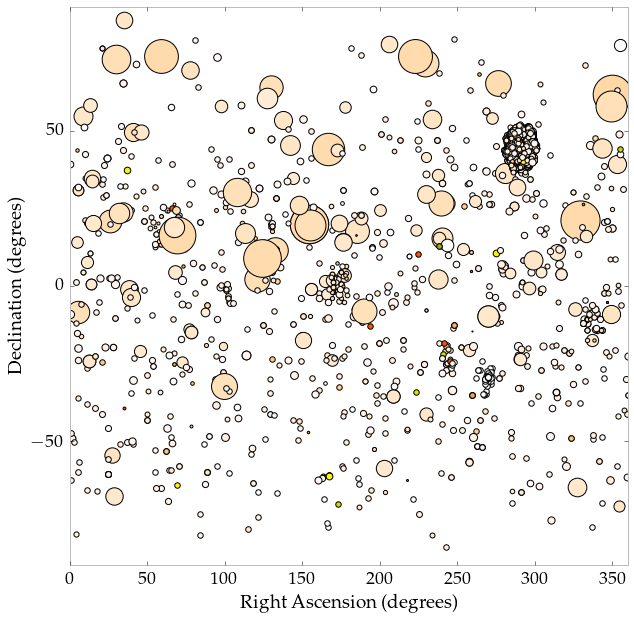

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.set_axis_bgcolor('black')

for p in positions:
    x = p[0]
    y = p[1]
    temp = p[2]
    radius = p[3]
    ax.scatter(x, y, s=radiustosize(radius), marker='o', c=temptocolor2(temp))

plt.xlim([0, 360])
plt.ylim([-90, 90])
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.show()

In [46]:
# Gives a set of parameters for matplotlib that are a little more pleasing
params = {'backend': 'ps',
          'axes.facecolor': 'white',
          'axes.labelsize': 19,
          'axes.labelcolor': 'black',
          'axes.edgecolor': '#bcbcbc',
          'axes.unicode_minus': False,
          'figure.figsize': [12, 8],
          #'figure.figsize': [10, 6.7],
          #'font.family': 'sans-serif',
          'font.size': 18,
          'font.family': 'serif',
          'font.serif': ['Palatino'],
          'grid.color': '#555555',
          'legend.fontsize': 14,
          'lines.linewidth': 1.5,
          'legend.loc': 'best',
          'legend.numpoints': 1,
          'legend.fancybox': True,
          'legend.shadow': True,
          'text.usetex': True,
          'xtick.color': 'black',
          'xtick.labelsize': 18,
          'xtick.major.pad': 6,
          'ytick.color': 'black',
          'ytick.labelsize': 18,
          'ytick.major.pad': 6,
         }
pylab.rcParams.update(params)

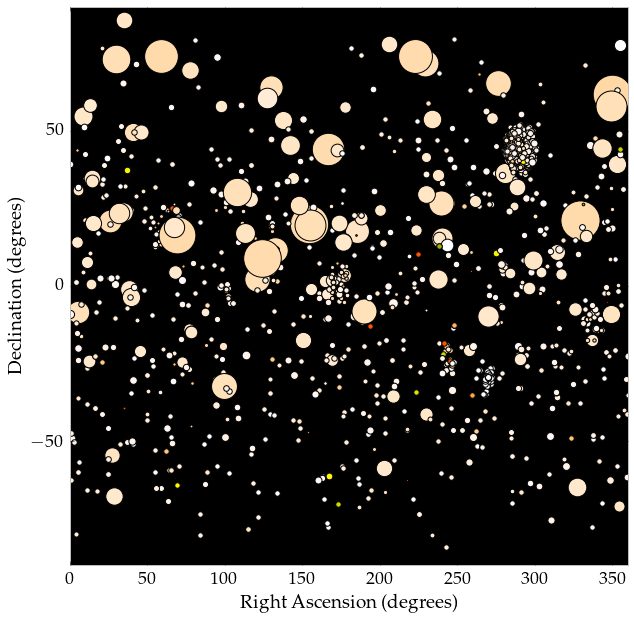

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_bgcolor('black')

for p in positions:
    x = p[0]
    y = p[1]
    temp = p[2]
    radius = p[3]
    ax.scatter(x, y, s=radiustosize(radius), marker='o', c=temptocolor2(temp))

plt.xlim([0, 360])
plt.ylim([-90, 90])
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.savefig("ExoPlanets1.png", bbox_inches='tight', dpi=150)
plt.show()

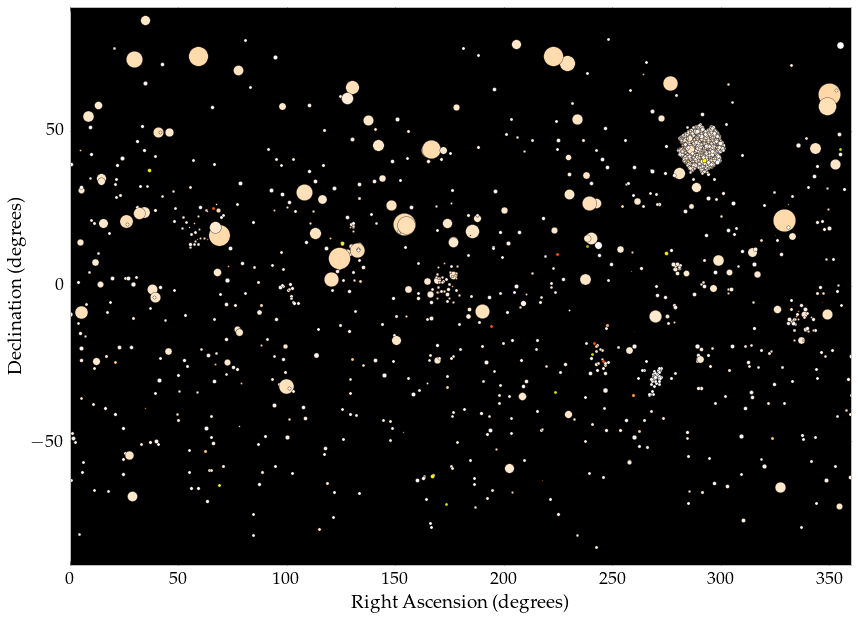

In [48]:
fig, ax = plt.subplots(figsize=(14,10))
ax.set_axis_bgcolor('black')

for p in positions:
    x = p[0]
    y = p[1]
    temp = p[2]
    radius = p[3]
    ax.scatter(x, y, s=radiustosize(radius,10), marker='o', c=temptocolor2(temp), linewidth='0.3')

plt.xlim([0, 360])
plt.ylim([-90, 90])
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.savefig("ExoPlanets2.png", bbox_inches='tight', dpi=150)
plt.savefig("ExoPlanets2.pdf", bbox_inches='tight')
plt.show()

(-90, 90)

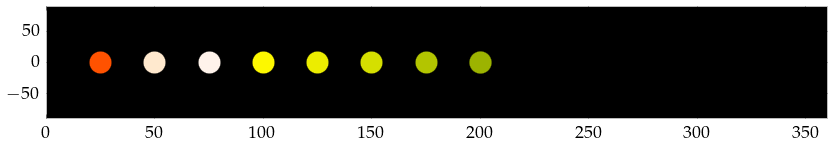

In [49]:
fig, ax = plt.subplots(figsize=(14,2))
ax.set_axis_bgcolor('black')

ax.scatter(25, 0, s=500, marker='o', c=temptocolor2(3000), linewidth='0.3')
ax.scatter(50, 0, s=500, marker='o', c=temptocolor2(5000), linewidth='0.3')
ax.scatter(75, 0, s=500, marker='o', c=temptocolor2(6000), linewidth='0.3')
ax.scatter(100, 0, s=500, marker='o', c=temptocolor2(7000), linewidth='0.3')
ax.scatter(125, 0, s=500, marker='o', c=temptocolor2(8000), linewidth='0.3')
ax.scatter(150, 0, s=500, marker='o', c=temptocolor2(10000), linewidth='0.3')
ax.scatter(175, 0, s=500, marker='o', c=temptocolor2(13000), linewidth='0.3')
ax.scatter(200, 0, s=500, marker='o', c=temptocolor2(25000), linewidth='0.3')
ax.scatter(200, 0, s=500, marker='o', c=temptocolor2(30000), linewidth='0.3')
plt.xlim([0, 360])
plt.ylim([-90, 90])

In [50]:
def temptocolor3(bv):
    return bv2rgb(bv)

(-90, 90)

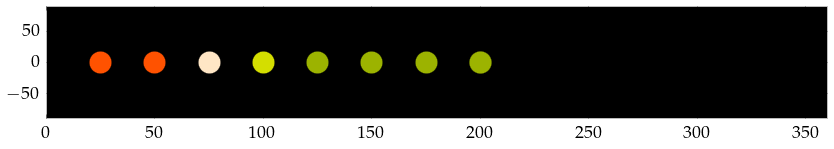

In [51]:
fig, ax = plt.subplots(figsize=(14,2))
ax.set_axis_bgcolor('black')

ax.scatter(25, 0, s=500, marker='o', c=temptocolor3(10), linewidth='0.3')
ax.scatter(50, 0, s=500, marker='o', c=temptocolor3(2), linewidth='0.3')
ax.scatter(75, 0, s=500, marker='o', c=temptocolor3(1), linewidth='0.3')
ax.scatter(100, 0, s=500, marker='o', c=temptocolor3(0), linewidth='0.3')
ax.scatter(125, 0, s=500, marker='o', c=temptocolor3(-1), linewidth='0.3')
ax.scatter(150, 0, s=500, marker='o', c=temptocolor3(-2), linewidth='0.3')
ax.scatter(175, 0, s=500, marker='o', c=temptocolor3(-6), linewidth='0.3')
ax.scatter(200, 0, s=500, marker='o', c=temptocolor3(-9), linewidth='0.3')
ax.scatter(200, 0, s=500, marker='o', c=temptocolor3(-1000), linewidth='0.3')
plt.xlim([0, 360])
plt.ylim([-90, 90])

In [52]:
  def bv2rgbother(bv):
    ''' convert blue value to rgb approximations. See
    http://stackoverflow.com/questions/21977786/ with thanks to @Spektre
    '''
    if bv < -0.4: bv = -0.4
    if bv > 2.0: bv = 2.0
    if bv >= -0.40 and bv < 0.00:
      t = (bv + 0.40) / (0.00 + 0.40)
      r = 0.61 + 0.11 * t + 0.1 * t * t
      g = 0.70 + 0.07 * t + 0.1 * t * t
      b = 1.0
    elif bv >= 0.00 and bv < 0.40:
      t = (bv - 0.00) / (0.40 - 0.00)
      r = 0.83 + (0.17 * t)
      g = 0.87 + (0.11 * t)
      b = 1.0
    elif bv >= 0.40 and bv < 1.60:
      t = (bv - 0.40) / (1.60 - 0.40)
      r = 1.0
      g = 0.98 - 0.16 * t
    else:
      t = (bv - 1.60) / (2.00 - 1.60)
      r = 1.0
      g = 0.82 - 0.5 * t * t
    if bv >= 0.40 and bv < 1.50:
      t = (bv - 0.40) / (1.50 - 0.40)
      b = 1.00 - 0.47 * t + 0.1 * t * t
    elif bv >= 1.50 and bv < 1.951:
      t = (bv - 1.50) / (1.94 - 1.50)
      b = 0.63 - 0.6 * t * t
    else:
      b = 0.0
    return [r, g, b]

In [53]:
def temptocolor4(bv):
    return bv2rgb(bv)

(-90, 90)

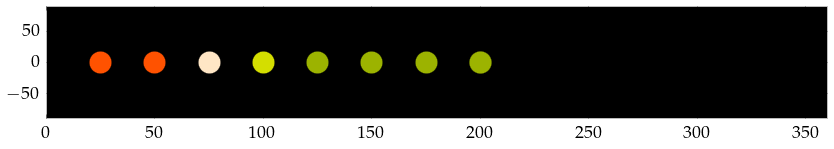

In [54]:
fig, ax = plt.subplots(figsize=(14,2))
ax.set_axis_bgcolor('black')

ax.scatter(25, 0, s=500, marker='o', c=temptocolor4(10), linewidth='0.3')
ax.scatter(50, 0, s=500, marker='o', c=temptocolor4(2), linewidth='0.3')
ax.scatter(75, 0, s=500, marker='o', c=temptocolor4(1), linewidth='0.3')
ax.scatter(100, 0, s=500, marker='o', c=temptocolor4(0), linewidth='0.3')
ax.scatter(125, 0, s=500, marker='o', c=temptocolor4(-1), linewidth='0.3')
ax.scatter(150, 0, s=500, marker='o', c=temptocolor4(-2), linewidth='0.3')
ax.scatter(175, 0, s=500, marker='o', c=temptocolor4(-6), linewidth='0.3')
ax.scatter(200, 0, s=500, marker='o', c=temptocolor4(-9), linewidth='0.3')
ax.scatter(200, 0, s=500, marker='o', c=temptocolor4(-1000), linewidth='0.3')
plt.xlim([0, 360])
plt.ylim([-90, 90])

In [55]:
# Taken from https://gist.github.com/petrklus/b1f427accdf7438606a6
def convert_K_to_RGB(colour_temperature):
    """
    Converts from K to RGB, algorithm courtesy of 
    http://www.tannerhelland.com/4435/convert-temperature-rgb-algorithm-code/
    """
    #range check
    if colour_temperature < 1000: 
        colour_temperature = 1000
    elif colour_temperature > 40000:
        colour_temperature = 40000
    
    tmp_internal = colour_temperature / 100.0
    
    # red 
    if tmp_internal <= 66:
        red = 255
    else:
        tmp_red = 329.698727446 * math.pow(tmp_internal - 60, -0.1332047592)
        if tmp_red < 0:
            red = 0
        elif tmp_red > 255:
            red = 255
        else:
            red = tmp_red
    
    # green
    if tmp_internal <=66:
        tmp_green = 99.4708025861 * math.log(tmp_internal) - 161.1195681661
        if tmp_green < 0:
            green = 0
        elif tmp_green > 255:
            green = 255
        else:
            green = tmp_green
    else:
        tmp_green = 288.1221695283 * math.pow(tmp_internal - 60, -0.0755148492)
        if tmp_green < 0:
            green = 0
        elif tmp_green > 255:
            green = 255
        else:
            green = tmp_green
    
    # blue
    if tmp_internal >=66:
        blue = 255
    elif tmp_internal <= 19:
        blue = 0
    else:
        tmp_blue = 138.5177312231 * math.log(tmp_internal - 10) - 305.0447927307
        if tmp_blue < 0:
            blue = 0
        elif tmp_blue > 255:
            blue = 255
        else:
            blue = tmp_blue
    
    return red, green, blue

In [56]:
def temptocolor5(tmpKelvin):
    if np.isnan(tmpKelvin):
        return [1, 1, 1]
    return np.array(convert_K_to_RGB(tmpKelvin)) / 255

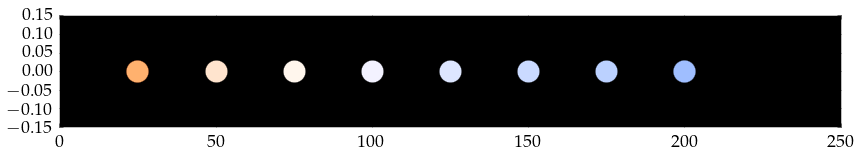

In [57]:
fig, ax = plt.subplots(figsize=(14,2))
ax.set_axis_bgcolor('black')

ax.scatter(25, 0, s=500, marker='o', c=temptocolor5(1000), linewidth='0.3')
ax.scatter(25, 0, s=500, marker='o', c=temptocolor5(3000), linewidth='0.3')
ax.scatter(50, 0, s=500, marker='o', c=temptocolor5(5000), linewidth='0.3')
ax.scatter(75, 0, s=500, marker='o', c=temptocolor5(6000), linewidth='0.3')
ax.scatter(100, 0, s=500, marker='o', c=temptocolor5(7000), linewidth='0.3')
ax.scatter(125, 0, s=500, marker='o', c=temptocolor5(8000), linewidth='0.3')
ax.scatter(150, 0, s=500, marker='o', c=temptocolor5(10000), linewidth='0.3')
ax.scatter(175, 0, s=500, marker='o', c=temptocolor5(13000), linewidth='0.3')
ax.scatter(200, 0, s=500, marker='o', c=temptocolor5(25000), linewidth='0.3')
ax.scatter(200, 0, s=500, marker='o', c=temptocolor5(30000), linewidth='0.3')
#plt.xlim([0, 360])
#plt.ylim([-90, 90])

# Plotting circles corresponding to orbital radius

In [58]:
def radiustosize2(rad, basesize):
    if np.isnan(rad):
        return basesize
    return basesize * rad**2

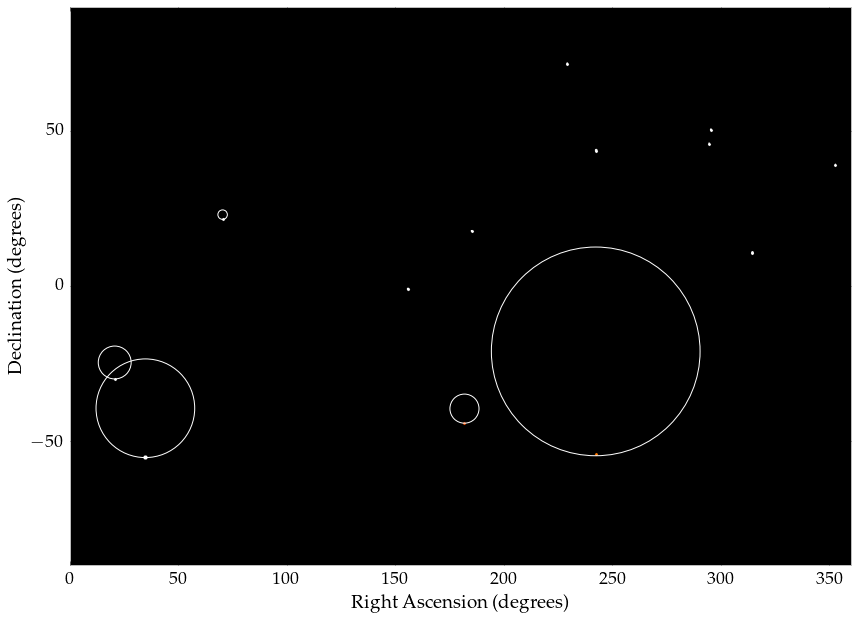

In [59]:
#fig, ax = plt.subplots(figsize=(40,20))
fig, ax = plt.subplots(figsize=(14,10))
ax.set_axis_bgcolor('black')

#for p in positions:
#for i in range(np.shape(positions)[0]):
for i in range(0,15):
    p = positions[i]
    x = p[0]
    y = p[1]
    temp = p[2]
    stellarradius = p[3]
    orbitAU = p[4]
    planetsize = p[5]
    planettemp = p[6]
    #ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=temptocolor5(temp), linewidth='0.3')
    #ax.scatter(x-orbitAU, y, s=radiustosize(planetsize,10), marker='o', c=temptocolor5(planettemp), linewidth='0.3')
#    ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=[1,1,1], linewidth='0.3')

    if np.isnan(orbitAU):
        continue
    #continue
    ax.scatter(x, y-orbitAU/10, s=radiustosize2(planetsize,10), marker='o', c=temptocolor5(planettemp), linewidth='0.3')
    ax.scatter(x, y, s=radiustosize2(orbitAU,0.4), marker='o', facecolors='none', edgecolors='w')
    

plt.xlim([0, 360])
plt.ylim([-90, 90])
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.savefig('ExoPlanets3.png', bbox_inches='tight', dpi=150)
#fig.savefig('out.png', bbox_inches='tight', dpi=150, pad_inches=0)
plt.show()

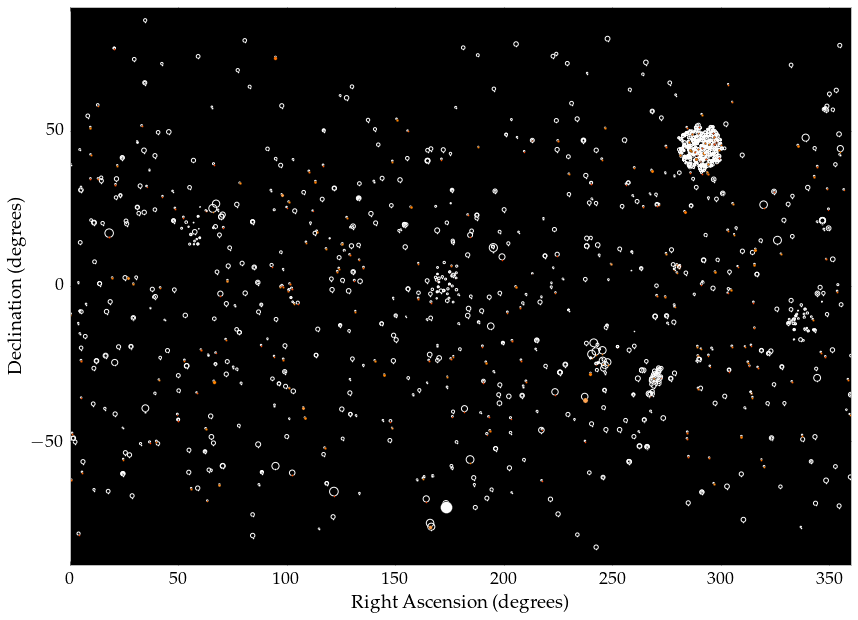

In [60]:
#fig, ax = plt.subplots(figsize=(40,20))
fig, ax = plt.subplots(figsize=(14,10))
ax.set_axis_bgcolor('black')

#for p in positions:
for i in range(np.shape(positions)[0]):
#for i in range(0,200):
    p = positions[i]
    x = p[0]
    y = p[1]
    temp = p[2]
    stellarradius = p[3]
    orbitAU = p[4]
    planetsize = p[5]
    planettemp = p[6]
    #ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=temptocolor5(temp), linewidth='0.3')
    #ax.scatter(x-orbitAU, y, s=radiustosize(planetsize,10), marker='o', c=temptocolor5(planettemp), linewidth='0.3')
#    ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=[1,1,1], linewidth='0.3')

    if np.isnan(orbitAU):
        continue
    #continue
    orbitmodified = np.log(250*orbitAU)
    ax.scatter(x, y, s=radiustosize2(orbitmodified,0.42), marker='o', facecolors='none', edgecolors='w')
    ax.scatter(x, y-orbitmodified/10, s=radiustosize2(planetsize,3), marker='o', c=temptocolor5(planettemp), linewidth='0.3')
    

plt.xlim([0, 360])
plt.ylim([-90, 90])
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.savefig('ExoPlanets4.png', bbox_inches='tight', dpi=150)
#fig.savefig('out.png', bbox_inches='tight', dpi=150, pad_inches=0)
plt.show()

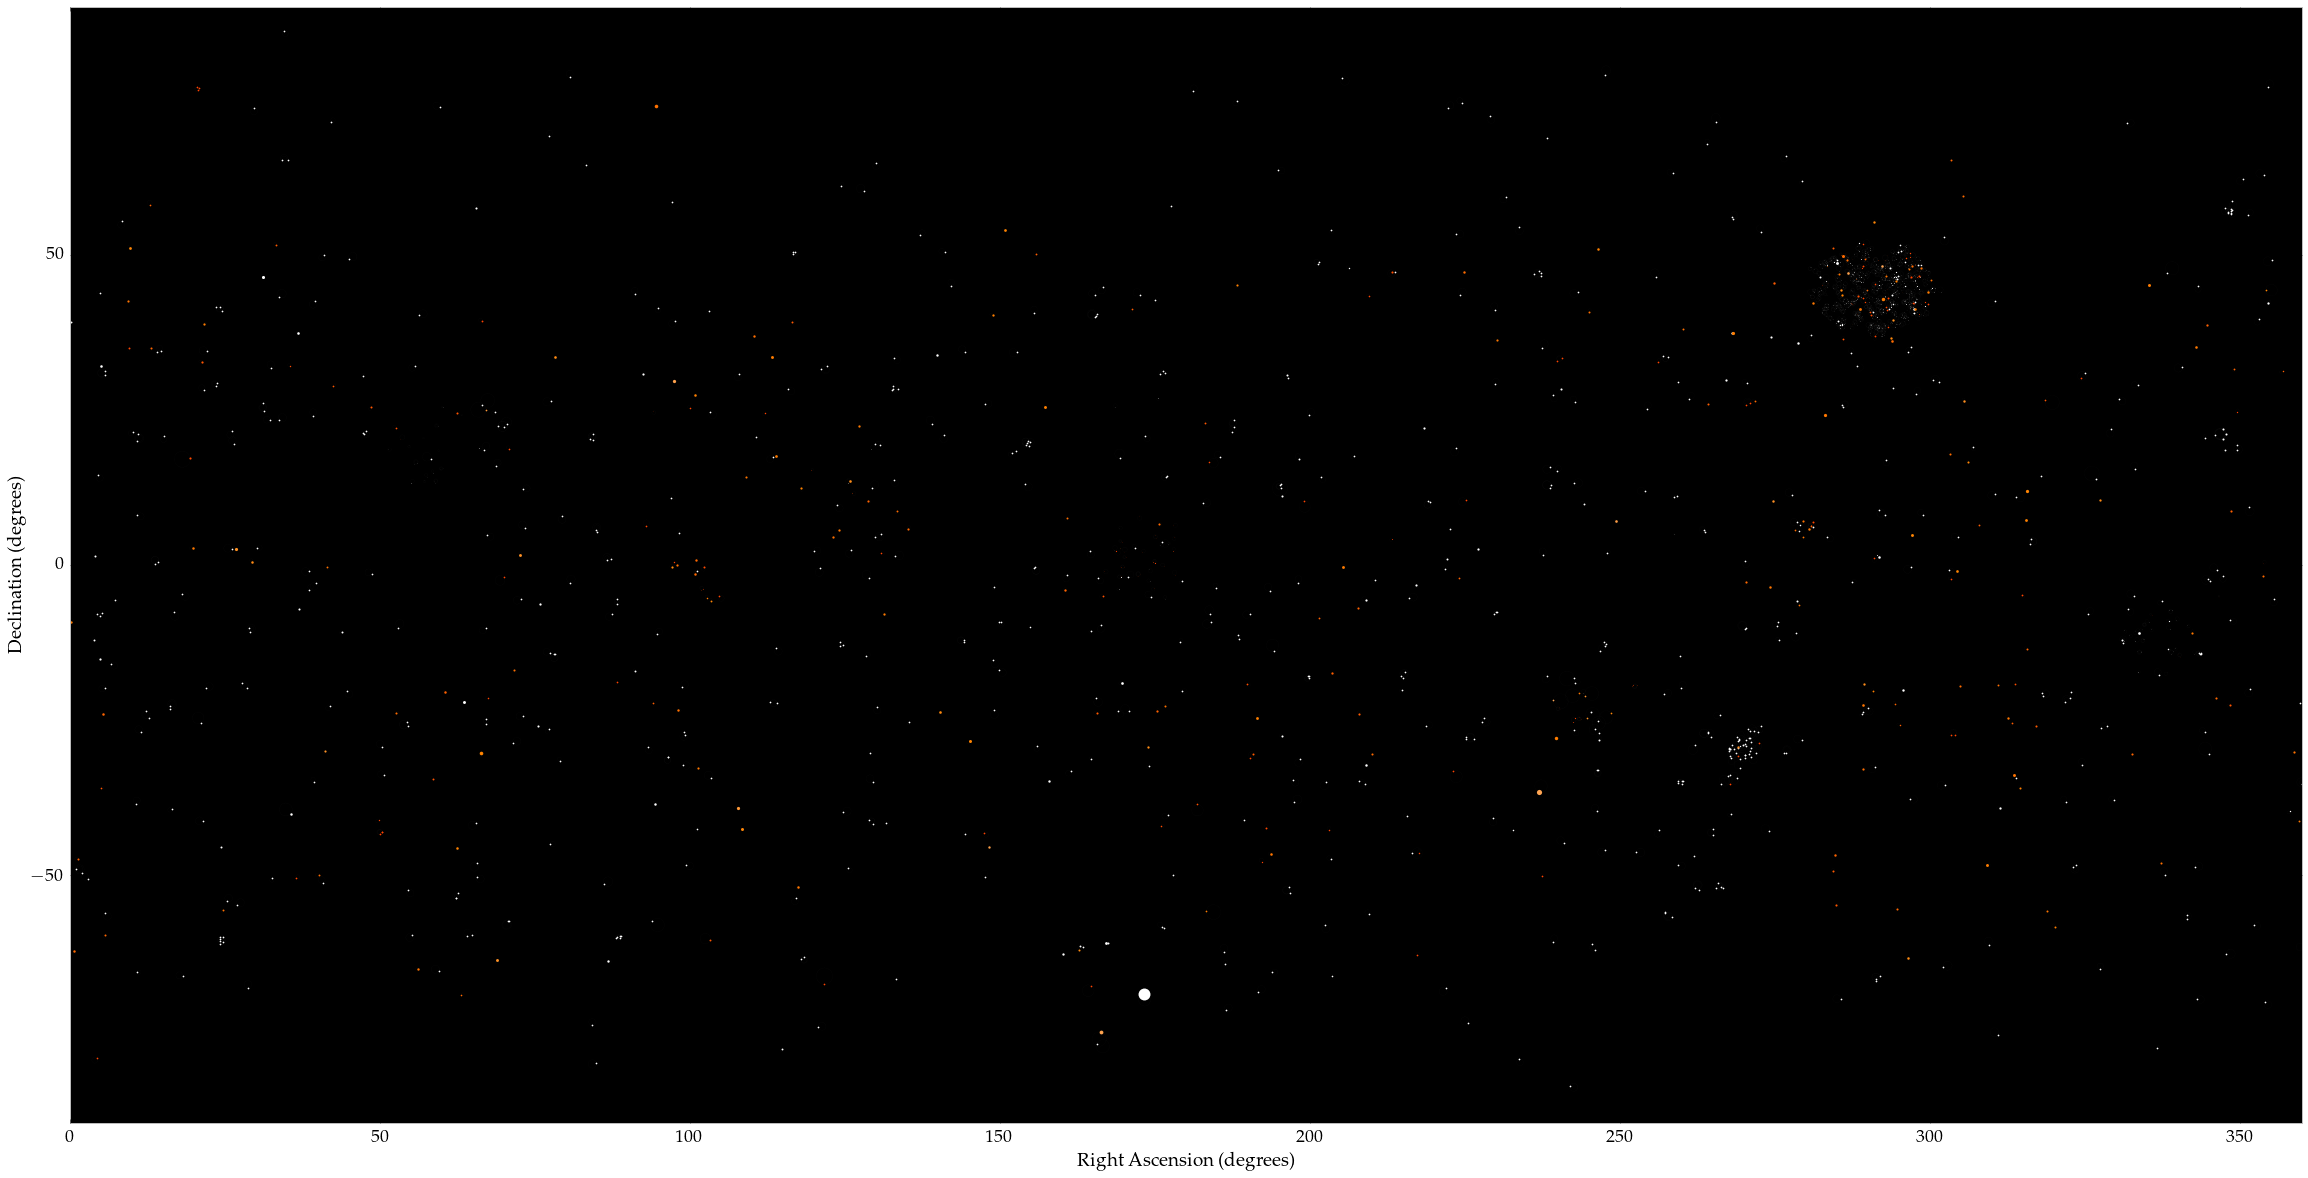

In [61]:
fig, ax = plt.subplots(figsize=(40,20))
#fig, ax = plt.subplots(figsize=(14,10))
ax.set_axis_bgcolor('black')

#for p in positions:
for i in range(np.shape(positions)[0]):
#for i in range(0,20):
    p = positions[i]
    x = p[0]
    y = p[1]
    temp = p[2]
    stellarradius = p[3]
    orbitAU = p[4]
    planetsize = p[5]
    planettemp = p[6]
    #ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=temptocolor5(temp), linewidth='0.3')
    #ax.scatter(x-orbitAU, y, s=radiustosize(planetsize,10), marker='o', c=temptocolor5(planettemp), linewidth='0.3')
#    ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=[1,1,1], linewidth='0.3')

    if np.isnan(orbitAU):
        continue
    #continue
    orbitmodified = np.log(250*orbitAU)
    randtheta = random.random() * 2*np.pi
    ax.scatter(x, y, s=radiustosize2(orbitmodified,1.5), marker='o', facecolors='none', edgecolors='w', linewidth='0.01')
    

#for p in positions:
for i in range(np.shape(positions)[0]):
#for i in range(0,20):
    p = positions[i]
    x = p[0]
    y = p[1]
    temp = p[2]
    stellarradius = p[3]
    orbitAU = p[4]
    planetsize = p[5]
    planettemp = p[6]
    #ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=temptocolor5(temp), linewidth='0.3')
    #ax.scatter(x-orbitAU, y, s=radiustosize(planetsize,10), marker='o', c=temptocolor5(planettemp), linewidth='0.3')
#    ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=[1,1,1], linewidth='0.3')

    if np.isnan(orbitAU):
        continue
    #continue
    orbitmodified = np.log(250*orbitAU)
    randtheta = random.random() * 2*np.pi
    ax.scatter(x+np.cos(randtheta)*orbitmodified/10, y+np.sin(randtheta)*orbitmodified/10, s=radiustosize2(planetsize,3), marker='o', c=temptocolor5(planettemp), linewidth='0.01')


plt.xlim([0, 360])
plt.ylim([-90, 90])
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.savefig('ExoPlanets5.pdf', bbox_inches='tight', dpi=150)
#fig.savefig('out.png', bbox_inches='tight', dpi=150, pad_inches=0)
plt.show()

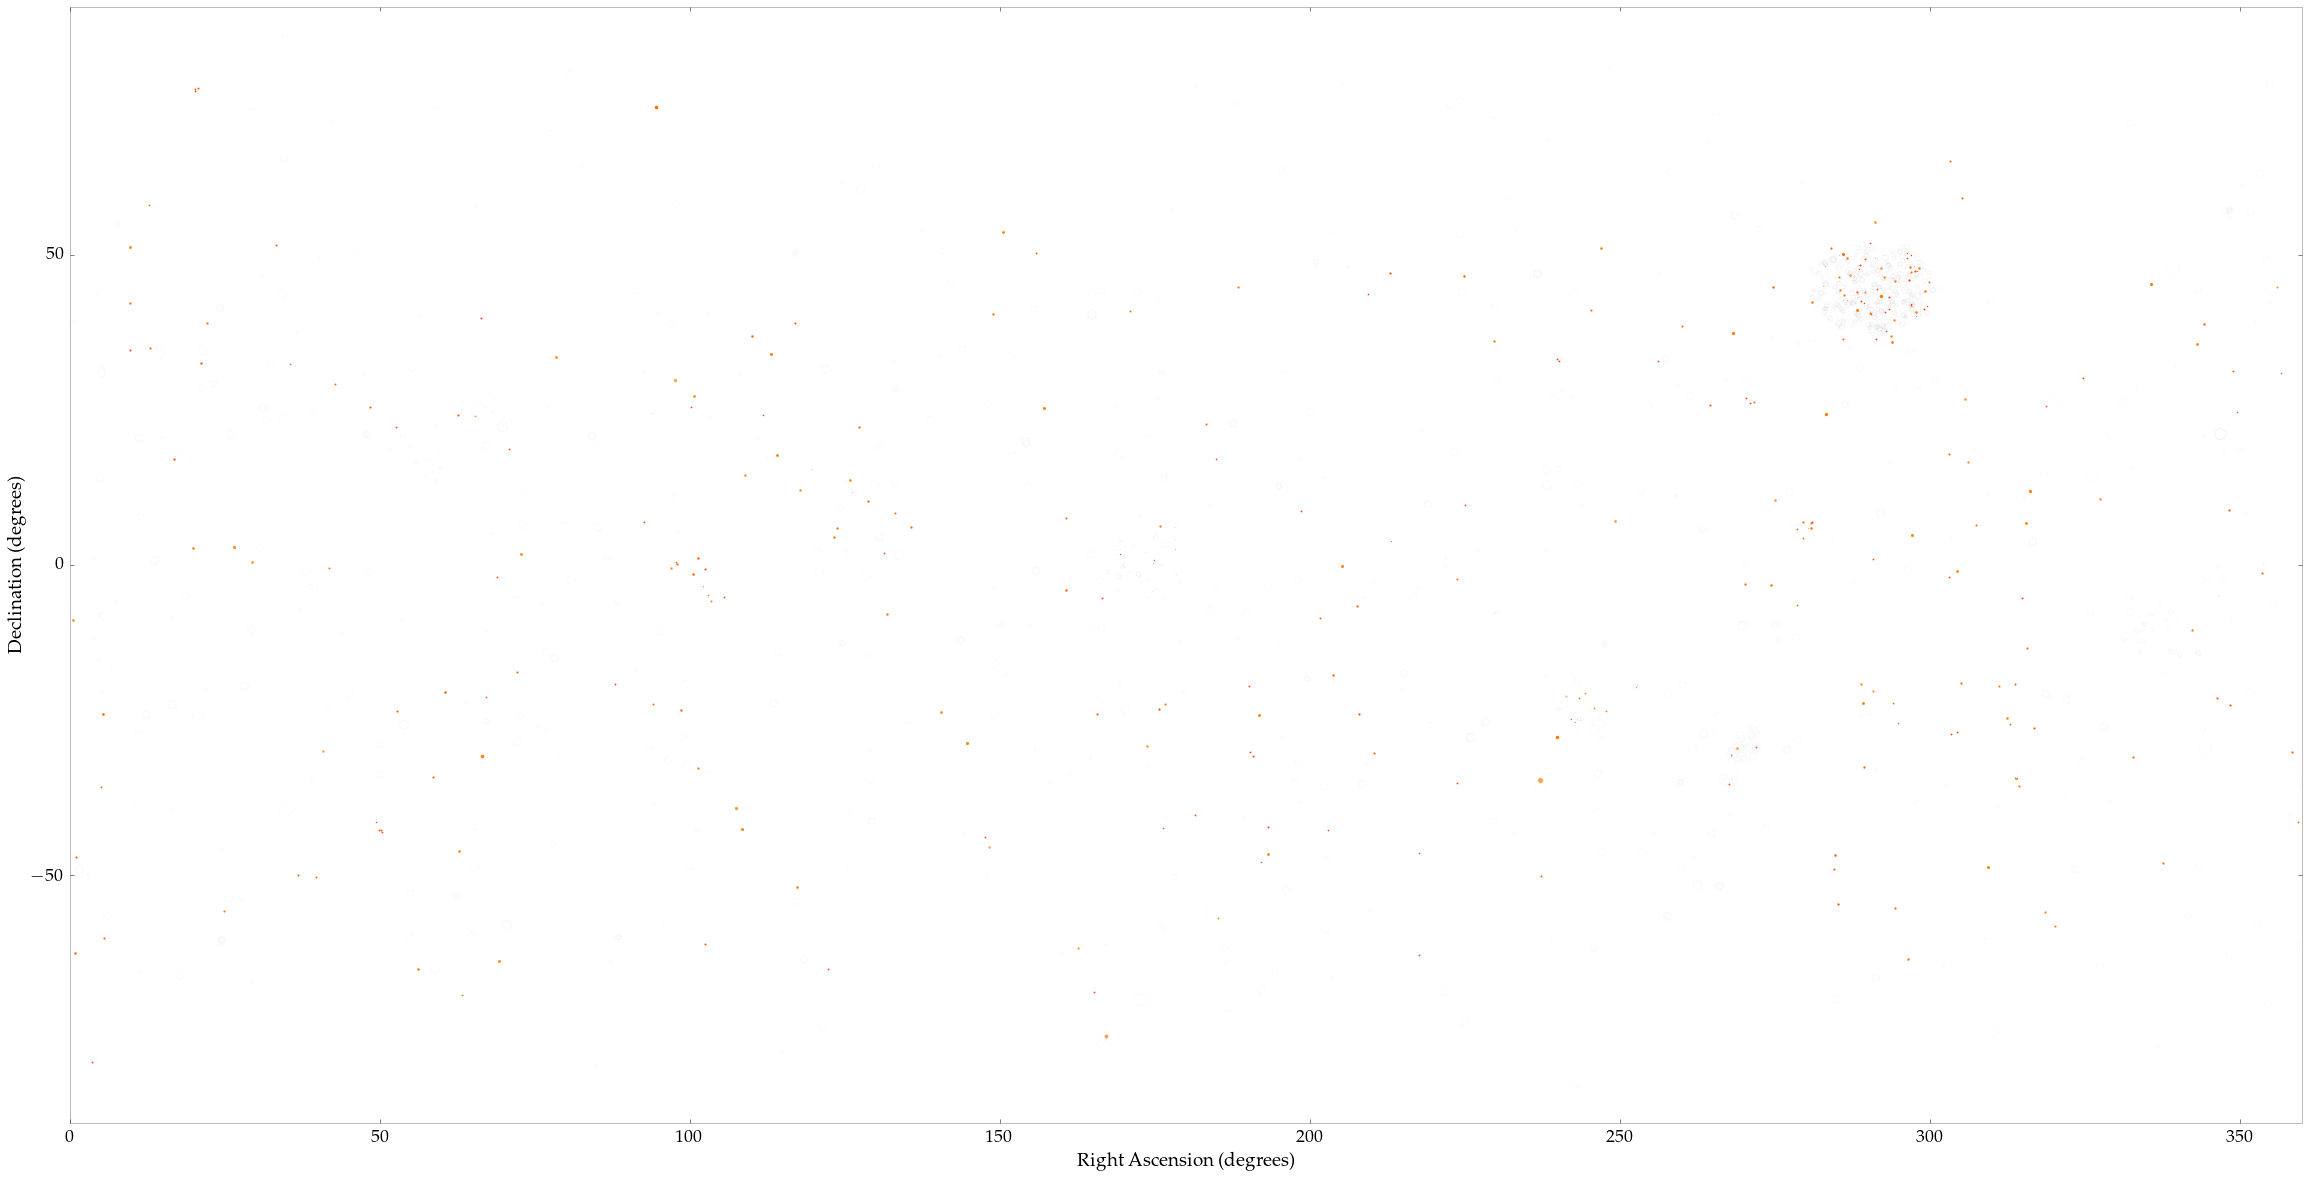

In [62]:
fig, ax = plt.subplots(figsize=(40,20))
#fig, ax = plt.subplots(figsize=(14,10))
ax.set_axis_bgcolor('white')

#for p in positions:
for i in range(np.shape(positions)[0]):
#for i in range(0,20):
    p = positions[i]
    x = p[0]
    y = p[1]
    temp = p[2]
    stellarradius = p[3]
    orbitAU = p[4]
    planetsize = p[5]
    planettemp = p[6]
    #ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=temptocolor5(temp), linewidth='0.3')
    #ax.scatter(x-orbitAU, y, s=radiustosize(planetsize,10), marker='o', c=temptocolor5(planettemp), linewidth='0.3')
#    ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=[1,1,1], linewidth='0.3')

    if np.isnan(orbitAU):
        continue
    #continue
    orbitmodified = np.log(250*orbitAU)
    randtheta = random.random() * 2*np.pi
    ax.scatter(x, y, s=radiustosize2(orbitmodified,1.5), marker='o', facecolors='none', edgecolors='black', linewidth='0.01')
    

#for p in positions:
for i in range(np.shape(positions)[0]):
#for i in range(0,20):
    p = positions[i]
    x = p[0]
    y = p[1]
    temp = p[2]
    stellarradius = p[3]
    orbitAU = p[4]
    planetsize = p[5]
    planettemp = p[6]
    #ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=temptocolor5(temp), linewidth='0.3')
    #ax.scatter(x-orbitAU, y, s=radiustosize(planetsize,10), marker='o', c=temptocolor5(planettemp), linewidth='0.3')
#    ax.scatter(x, y, s=radiustosize(stellarradius,10), marker='o', c=[1,1,1], linewidth='0.3')

    if np.isnan(orbitAU):
        continue
    #continue
    orbitmodified = np.log(250*orbitAU)
    randtheta = random.random() * 2*np.pi
    ax.scatter(x+np.cos(randtheta)*orbitmodified/10, y+np.sin(randtheta)*orbitmodified/10, s=radiustosize2(planetsize,3), marker='o', c=temptocolor5(planettemp), edgecolors='black', linewidth='0.01')


plt.xlim([0, 360])
plt.ylim([-90, 90])
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.savefig('ExoPlanets5white.pdf', bbox_inches='tight', dpi=150)
#fig.savefig('out.png', bbox_inches='tight', dpi=150, pad_inches=0)
plt.show()